## Exercise in Photogrammetry II
# Ex. 07 Kalman Filter
### Submission: 05.02.2021 
### Points: 20

### A. Bayes Rule
Use the Bayes rule 
$$P(A|B)= \frac{P(B|A)P(A)}{P(B)}$$
to solve following problem:

  Last year 100 students have taken the exam in mathematics.
  50 of them passed the exam. 42 out of these 50 have been doing homeworks.
  There is only one student who did the homeworks but failed the exam.
  
  
**Task**
1.   Find the probability for a student to pass the exam, given he has done all the homeworks. Therefore, solve the following tasks:
    1. Name each of the probabilities $[P(A|B),P(B|A),P(A),P(B)]$ in the context of this task. (2 Points)
      - E.g. P(A|B)= Probabilitiy of ... given ...
    2. Compute the probability for the given values. (2 Points)

**My answer:**

A. Name each of the probabilities: 

* P(A): Probability of a student that pass the exam -> P($\overline{A}$): Probability of fail the exam
* P(B): Probability of a student that do homework -> P($\overline{B}$): Probability of not do homework
* P(A|B): Probability of a student that pass the exam and did the homework before
* P(B|A): Probability of a student that did the homework among these student passed the exam


B. Compute the probability for the given values

We have: 
* P(A) = 50/100 = 0.5
* P(B|A) = 42/50 = 0.84
* P($\overline{A}$|B) = 1/50 = 0.02
* P(A|B) = 1 - P($\overline{A}$|B) = 1 - 0.02 = 0.98
* P(B) = $\frac{P(B|A)P(A)}{P(A|B)}$ = 0.84 * 0.5 / 0.98 = 0.4285

### B. Kalman Filter
In the lecture you got to know the Kalman Filter as a realization of the Bayes filter where you assume a linear model and gaussian distributed noise. In this exercise, you need to estimate the height and velocity of a falling object in ${R}^1$ recursively for specific time intervals of $t=1$ seconds.

Assume the initial state of the object to be given by its height $y=95.5$ m and velocity $v=0$ $\frac{m}{s}$ and corresponding uncertainties $\sigma_y^2=0.25$ and $\sigma_v^2=0.05$. We assume a motion with uniform acceleration of $a=1$ $\frac{m}{s^2}$ which we will treat as a control command. In addition, you observe the height of the falling object for five consecutive time steps $z = [96.4, 95.9, 94.4, 87.7, 85.3]$ m with $\sigma_z^2=0.5$.
The covariance of the process noise is given as follwing: 
    $${\Sigma}_t = \begin{pmatrix} 0.1 & 0 \\ 0 & 0.1 \end{pmatrix}$$

**Tasks:**
2. What are the unknows of your state vector $\mathbf{x}_t$? (1 Point)
3. Write down the linear model $\mathbf{x}_t=\mathbf{A}_t\mathbf{x}_{t-1} + \mathbf{B}_t \mathbf{u}_t$ explicitly and print the matrices $\mathbf{A}_t$, $\mathbf{B}_t$ to the terminal. (3 Points)
4. Write down the linear model $\mathbf{z}_t=\mathbf{C}_t \mathbf{x}_t$ explicitly and print the matrix $\mathbf{C}_t$ to the terminal. (2 Points)
5. Recursively estimate the state $\mathbf{x}_t$ of the falling object for five consecutive time steps according to the Kalman Filter.
For each time step visualize the predicted heigth of $\bar{\mathbf{x}}_t$, the observation $\mathbf{z}_t$ and the posteriori state estimate $\mathbf{x}_t$. Plot time steps on the x-axis and height on the y-axis. (6)
6. Assume the measurements of your sensor to be unreliable. This time set the uncertainty $\sigma_z^2=1e^8$ and recursively estimate the state. Visualize your results and explain the behaviour of the Kalman Filter. (2 Points)
7. Assume the measurements of your sensor to be nearly perfect. This time set the uncertainty $\sigma_z^2=1e^{-8}$ and recursively estimate the state. Visualize your results and explain the behaviour of the Kalman Filter. (2 Points)


**My answer:**

2. The unknows of the state vector $x_t$ are: 
    * The position (height) of the object at time t
    * The velocity of the object at time t

3. The Motion model (a linear model) of form: $x_t = A_t x_{t-1} + B_t u_t$:

From Newtonian physics, the height of the object at time t is: 

$y(t) = y(t_0) + \dot{y}(t_0)\Delta t + \frac{1}{2}(a+g)(\Delta t)^2$

($a = 1 m/s^2$ and $g = -9.82 m/s^2$)  

The velocity of the object at time t is:

$\dot{y}(t) = \dot{y}(t_0) + (g+a)\Delta t$

If we assume regular discrete time intervals $\Delta t = 1$ then we can write the height and the velocity of the object at state t+1 w.r.t to the state t as: 

$y_{t+1} = y_{t} + \dot{y}_t + \frac{1}{2}(g + a)$

$\dot{y}_{t+1} = \dot{y}_t + (g + a)$

* Our state vector is: $x_t = \begin{bmatrix}
y_t \\ \dot{y}_t
\end{bmatrix}$

* Our control input is: $u_t = (g+a)$

* Our Motion Model is: $x_{t+1} = Ax_t + Bu_t + w_t = A  \begin{bmatrix}
y_t \\ \dot{y}_t
\end{bmatrix} + B (g + a) + w_t$  

In [1]:
import numpy as np
from math import sqrt

In [2]:
# A
A = np.array([[1., 1], [0, 1]])
print(A)

[[1. 1.]
 [0. 1.]]


In [3]:
# B
B = np.array([[1/2], [0]])
print(B)

[[0.5]
 [0. ]]


In [4]:
g = -9.82
a = 1

4. The Observation model (a linear model) of form: $z_t = C_t x_t$

See these posts: 
* https://dsp.stackexchange.com/questions/27484/observation-matrix-in-kalman-filter

* http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/

They said that in the current model, the Observation Matrix is contain with 0's and 1's, so in my case: 

In [5]:
# C_t has shape (1, 2)
C_t = np.array([[1., 0]])

5. Recursively estimate the state $\mathbf{x}_t$ of the falling object for five consecutive time steps according to the Kalman Filter.
For each time step visualize the predicted heigth of $\bar{\mathbf{x}}_t$, the observation $\mathbf{z}_t$ and the posteriori state estimate $\mathbf{x}_t$. Plot time steps on the x-axis and height on the y-axis. 

In [6]:
# I'll implement by the notation that Cyrill gaved

In [7]:
# Function Kalman Filter, I implemented in the script ex16.py
from ex16 import kalman_filter

In [8]:
z = np.array([96.4, 95.9, 94.4, 87.7, 85.3])
process_noise_cov = np.array([[0.1, 0], [0, 0.1]])
sens_noise_cov = 0.5

init_state = np.array([[95.5], [0]])
init_cov = np.array([[0.25, sqrt(0.25 * 0.05)],
                     [sqrt(0.25 * 0.05), 0.05]])

ctrl_vec = g + a

# Begin track 
prediction = []
correction = []

next_state = init_state
update_cov = init_cov

for i in range(5):
    predict_state, next_state, update_cov = kalman_filter(next_state, update_cov, ctrl_vec, z[i], process_noise_cov, sens_noise_cov, A, B, C_t)
    correction.append(next_state)
    prediction.append(predict_state)
    
correction = np.stack(correction, axis=0)
correction = np.squeeze(correction, axis=2)

prediction = np.stack(prediction, axis=0)
prediction = np.squeeze(prediction, axis=2)

In [9]:
print(prediction)

[[91.09        0.        ]
 [90.39173275  0.764659  ]
 [90.42152215  1.69060683]
 [90.82259002  2.54655556]
 [86.05666664  1.81336267]]


In [10]:
print(correction)

[[94.03707375  0.764659  ]
 [93.14091532  1.69060683]
 [92.68603446  2.54655556]
 [88.65330397  1.81336267]
 [85.44809773  1.63571922]]


In [11]:
print(z)

[96.4 95.9 94.4 87.7 85.3]


In [17]:
pred_height = prediction[:, 0]
print(pred_height)

[91.09       90.39173275 90.42152215 90.82259002 86.05666664]


In [18]:
correction_height = correction[:, 0]
print(correction_height)

[94.03707375 93.14091532 92.68603446 88.65330397 85.44809773]


In [12]:
# Plot these 3 on the same image
import matplotlib.pyplot as plt
%matplotlib inline

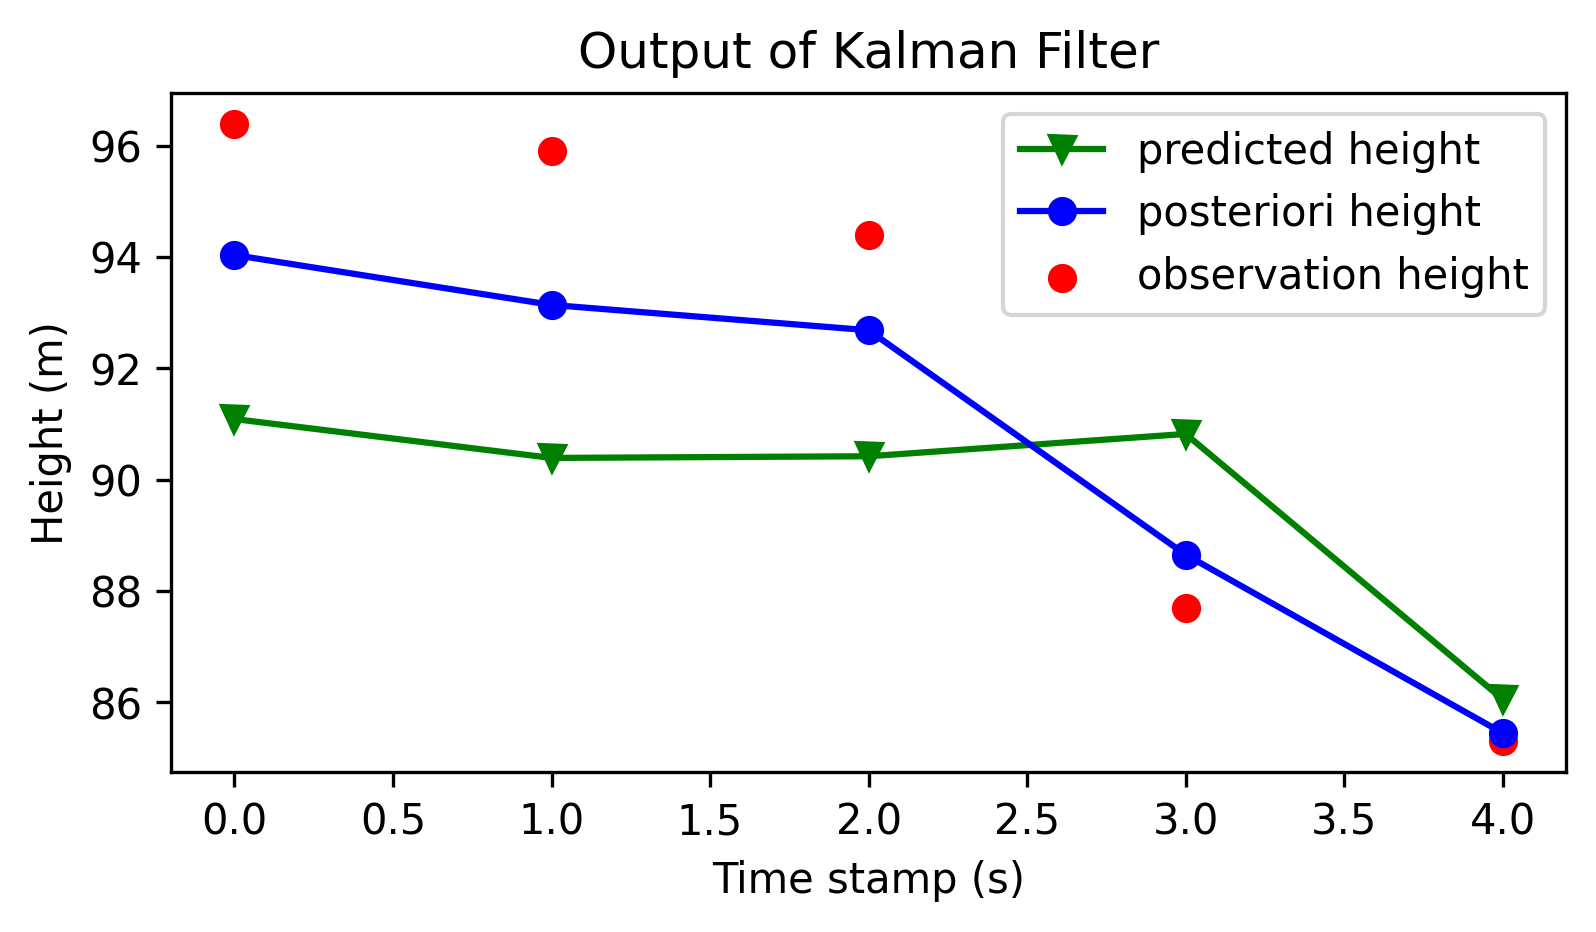

In [39]:
x = np.array([0, 1, 2, 3, 4])
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
ax.scatter(x, z, c='red', label='observation height')
ax.plot(x, pred_height, '-v', c='green', label='predicted height')
ax.plot(x, correction_height, '-o', c='blue', label='posteriori height')
ax.set_xlabel('Time stamp (s)')
ax.set_ylabel('Height (m)')
ax.set_title('Output of Kalman Filter')
ax.legend()

6. Assume the measurements of your sensor to be unreliable. This time set the uncertainty $\sigma_z^2=1e^8$ and recursively estimate the state. Visualize your results and explain the behaviour of the Kalman Filter. (2 Points)

In [40]:
sens_noise_cov_unreliable = 1e8

In [41]:
# Begin track 
prediction = []
correction = []

next_state = init_state
update_cov = init_cov

for i in range(5):
    predict_state, next_state, update_cov = kalman_filter(next_state, update_cov, ctrl_vec, z[i], process_noise_cov, sens_noise_cov_unreliable, A, B, C_t)
    correction.append(next_state)
    prediction.append(predict_state)
    
correction = np.stack(correction, axis=0)
correction = np.squeeze(correction, axis=2)

prediction = np.stack(prediction, axis=0)
prediction = np.squeeze(prediction, axis=2)

In [42]:
pred_height = prediction[:, 0]
print(pred_height)

[91.09       86.68000004 82.27000019 77.86000056 73.45000112]


In [43]:
correction_height = correction[:, 0]
print(correction_height)

[91.09000003 86.68000015 82.27000045 77.86000093 73.45000185]


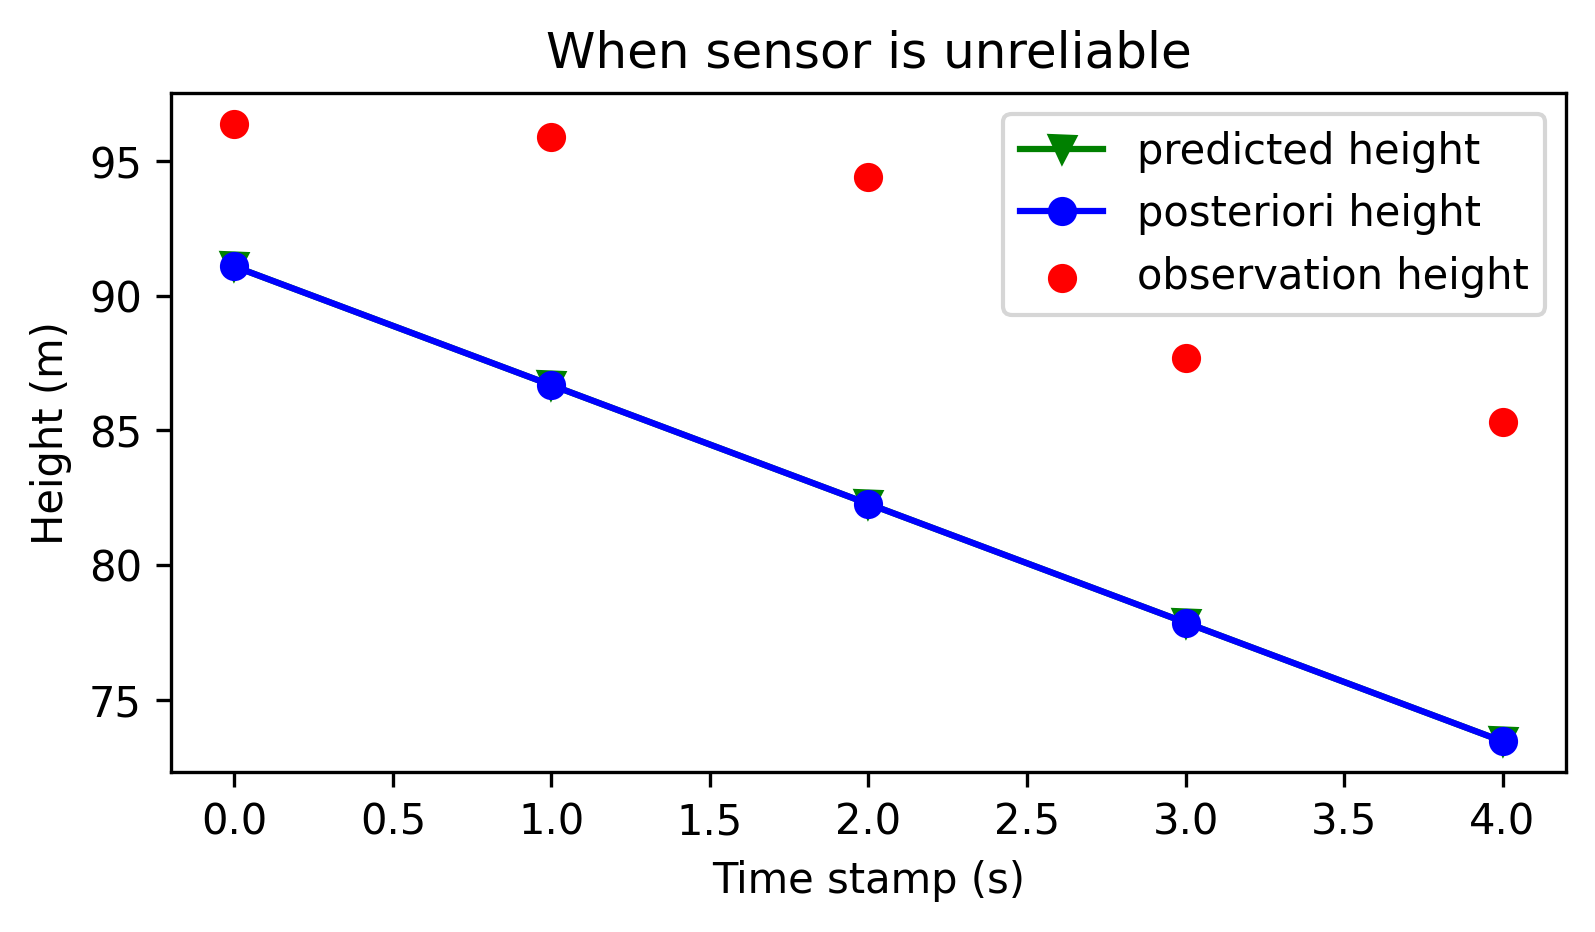

In [44]:
x = np.array([0, 1, 2, 3, 4])
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
ax.scatter(x, z, c='red', label='observation height')
ax.plot(x, pred_height, '-v', c='green', label='predicted height')
ax.plot(x, correction_height, '-o', c='blue', label='posteriori height')
ax.set_xlabel('Time stamp (s)')
ax.set_ylabel('Height (m)')
ax.set_title('When sensor is unreliable')
ax.legend()

**My explanation:**

```text
When the sensor is unreliable, the covariance noise from sensor is very hight. Then the Kalman Filter will trust the predicted height instead of the observation height that we got from the sensor.
```

7. Assume the measurements of your sensor to be nearly perfect. This time set the uncertainty $\sigma_z^2=1e^{-8}$ and recursively estimate the state. Visualize your results and explain the behaviour of the Kalman Filter. (2 Points)


In [45]:
sens_noise_cov_perfect = 1e-8

In [46]:
# Begin track 
prediction = []
correction = []

next_state = init_state
update_cov = init_cov

for i in range(5):
    predict_state, next_state, update_cov = kalman_filter(next_state, update_cov, ctrl_vec, z[i], process_noise_cov, sens_noise_cov_perfect, A, B, C_t)
    correction.append(next_state)
    prediction.append(predict_state)
    
correction = np.stack(correction, axis=0)
correction = np.squeeze(correction, axis=2)

prediction = np.stack(prediction, axis=0)
prediction = np.squeeze(prediction, axis=2)

In [47]:
pred_height = prediction[:, 0]
print(pred_height)

[91.09       93.36775275 90.73865486 97.73372229 78.69527806]


In [48]:
correction_height = correction[:, 0]
print(correction_height)

[96.39999991 95.90000041 94.39999993 87.69999985 85.30000003]


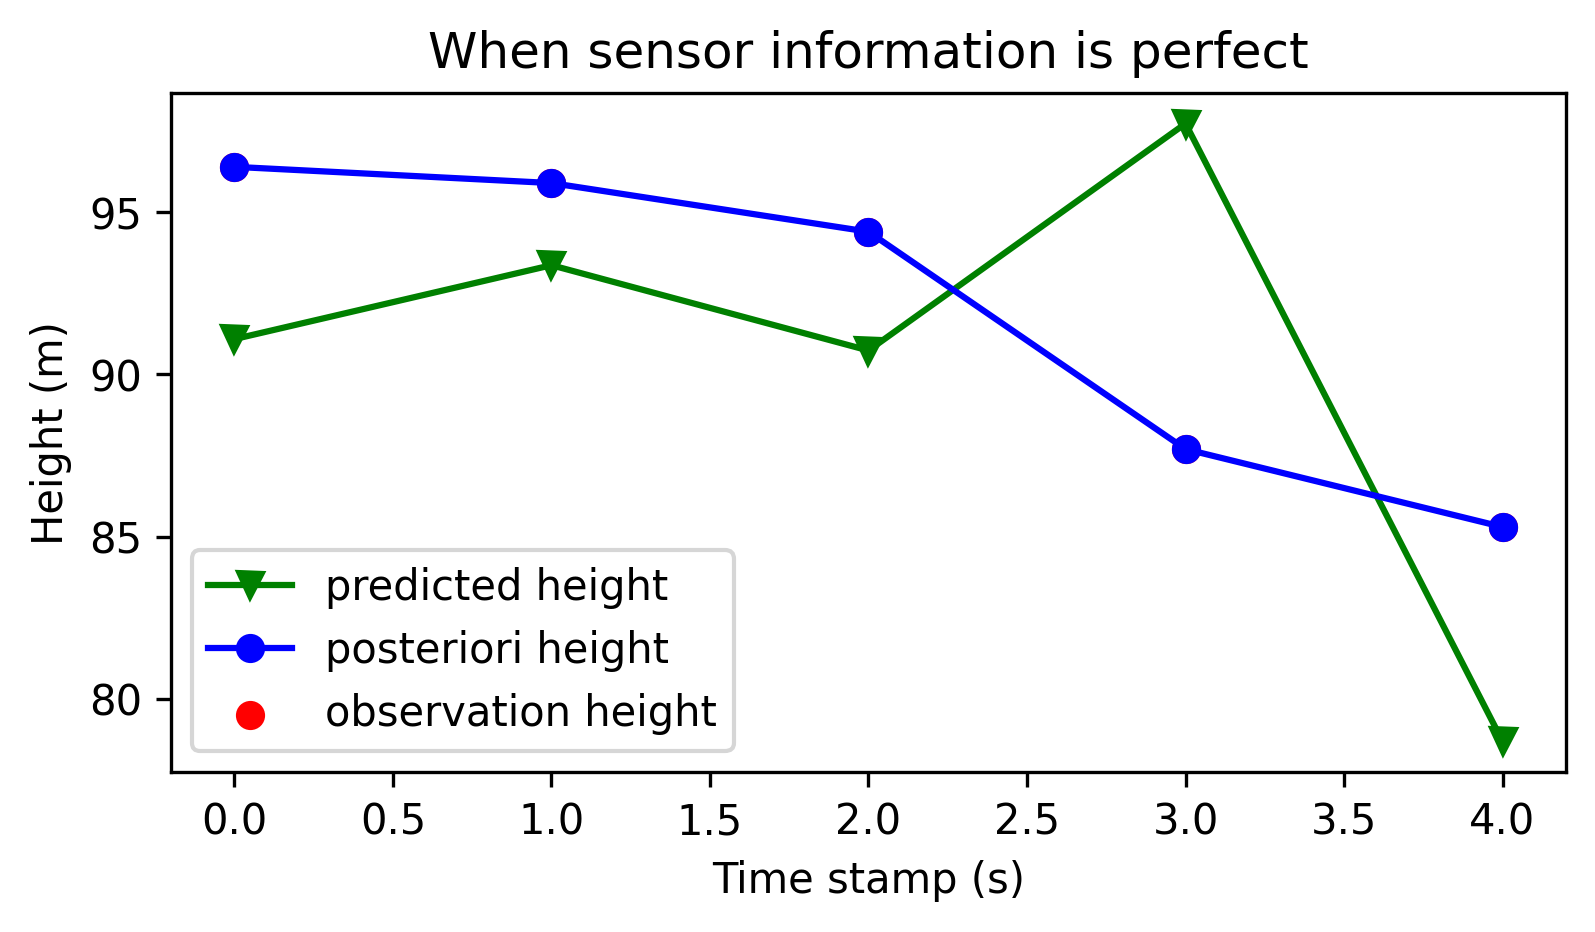

In [50]:
x = np.array([0, 1, 2, 3, 4])
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
ax.scatter(x, z, c='red', label='observation height')
ax.plot(x, pred_height, '-v', c='green', label='predicted height')
ax.plot(x, correction_height, '-o', c='blue', label='posteriori height')
ax.set_xlabel('Time stamp (s)')
ax.set_ylabel('Height (m)')
ax.set_title('When sensor information is perfect')
ax.legend()

**My explanation:**
```text
When the information we got from the sensor is nearly perfect, then the Kalman Filter will trust the result we get from the observation.

```